In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt

using dark_emulator at  /Users/sunao-mac/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py


In [3]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


In [4]:
fishers_dict = od()

## Instantiate Fisher classes
### Year 1 single source bin

In [5]:
dirname = './precomputed_Cl/single_source_ClY1'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y1, 1bin)')
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear (Y1, 1bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt (Y1, 1bin)')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y1single2x2pt'] = fisher2x2pt
fishers_dict['Y1single1x2pt'] = fisher1x2pt
fishers_dict['Y1single3x2pt'] = fisher3x2pt
fishers_dict['Y1single2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1single1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1single3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (66, 66), dim(data)=(66,)
cov.shape = (17, 17), dim(data)=(17,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (83, 83), dim(data)=(83,)


### Year 1 double source bins

In [6]:
dirname = './precomputed_Cl/double_source_ClY1'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y1, 2bin)')
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear (Y1, 2bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt (Y1, 2bin)')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y1double2x2pt'] = fisher2x2pt
fishers_dict['Y1double1x2pt'] = fisher1x2pt
fishers_dict['Y1double3x2pt'] = fisher3x2pt
fishers_dict['Y1double2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1double1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1double3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (51, 51), dim(data)=(51,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (141, 141), dim(data)=(141,)


### Year 1 quadruple source bins

In [7]:
%%time
# to avoid overlap of lens galaxy and source galaxy in 1,2 bins.
probe_names_dict_to_skip={'gamma_t':[['lowz', 's1'], ['lowz', 's2'],
                                     ['cmass1', 's1'], ['cmass1', 's2'], 
                                     ['cmass2', 's1'], ['cmass2', 's2']]}

dirname = './precomputed_Cl/quadruple_source_ClY1'

fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y1, 4bin)', probe_names_dict_to_skip=probe_names_dict_to_skip)
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear (Y1, 4bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt (Y1, 4bin)', probe_names_dict_to_skip=probe_names_dict_to_skip)

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y1quadruple2x2pt'] = fisher2x2pt
fishers_dict['Y1quadruple1x2pt'] = fisher1x2pt
fishers_dict['Y1quadruple3x2pt'] = fisher3x2pt
fishers_dict['Y1quadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y1quadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y1quadruple3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (170, 170), dim(data)=(170,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (260, 260), dim(data)=(260,)
CPU times: user 1min 47s, sys: 11.4 s, total: 1min 58s
Wall time: 1min 31s


### Year **3** single source bin

In [8]:
dirname = './precomputed_Cl/single_source_ClY3'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y3, 1bin)')
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear (Y3, 1bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt (Y3, 1bin)')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph','dm'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph','dm'], label='Prior')

fishers_dict['Y3single2x2pt'] = fisher2x2pt
fishers_dict['Y3single1x2pt'] = fisher1x2pt
fishers_dict['Y3single3x2pt'] = fisher3x2pt
fishers_dict['Y3single2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3single1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3single3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (66, 66), dim(data)=(66,)
cov.shape = (17, 17), dim(data)=(17,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (83, 83), dim(data)=(83,)


### year 3 double source bins

In [9]:
dirname = './precomputed_Cl/double_source_ClY3'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y3, 2bin)')
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear (Y3, 2bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt (Y3, 2bin)')

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dm1','dm2'], label='Prior')

fishers_dict['Y3double2x2pt'] = fisher2x2pt
fishers_dict['Y3double1x2pt'] = fisher1x2pt
fishers_dict['Y3double3x2pt'] = fisher3x2pt
fishers_dict['Y3double2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3double1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3double3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (51, 51), dim(data)=(51,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (141, 141), dim(data)=(141,)


### Year 3 quadruple source bins

In [10]:
%%time
# to avoid overlap of lens galaxy and source galaxy in 1,2 bins.
probe_names_dict_to_skip={'gamma_t':[['lowz', 's1'], ['lowz', 's2'],
                                     ['cmass1', 's1'], ['cmass1', 's2'], 
                                     ['cmass2', 's1'], ['cmass2', 's2']]}

dirname = './precomputed_Cl/quadruple_source_ClY3'

fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y3, 4bin)', probe_names_dict_to_skip=probe_names_dict_to_skip)
fisher1x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                                 label='Cosmic Shear (Y3, 4bin)')
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1,
                                 label='3x2pt (Y3, 4bin)', probe_names_dict_to_skip=probe_names_dict_to_skip)

fisher2x2ptPrior = fisher2x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01],
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher1x2ptPrior = fisher1x2pt.addPrior([0.00038, 0.0042, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fisher3x2ptPrior = fisher3x2pt.addPrior([0.00038, 0.0042, 0.5, 0.5, 0.5, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01], 
                                        ['omega_b', 'ns', 
                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                         'dzph1','dzph2','dzph3','dzph4','dm1','dm2','dm3','dm4'], label='Prior')

fishers_dict['Y3quadruple2x2pt'] = fisher2x2pt
fishers_dict['Y3quadruple1x2pt'] = fisher1x2pt
fishers_dict['Y3quadruple3x2pt'] = fisher3x2pt
fishers_dict['Y3quadruple2x2ptPrior'] = fisher2x2ptPrior
fishers_dict['Y3quadruple1x2ptPrior'] = fisher1x2ptPrior
fishers_dict['Y3quadruple3x2ptPrior'] = fisher3x2ptPrior

cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (170, 170), dim(data)=(170,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (260, 260), dim(data)=(260,)
CPU times: user 1min 50s, sys: 11.5 s, total: 2min 1s
Wall time: 1min 34s


## Plot

In [11]:
corner = hsc3x2pt.corner_class()

### 3x2pt: single vs double vs quadruple

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8$
"3x2pt (Y3, 1bin) + Prior",0.04430,0.04076,0.03387
"3x2pt (Y3, 2bin) + Prior",0.04419,0.03816,0.02426
"3x2pt (Y3, 4bin) + Prior",0.04102,0.03482,0.02011


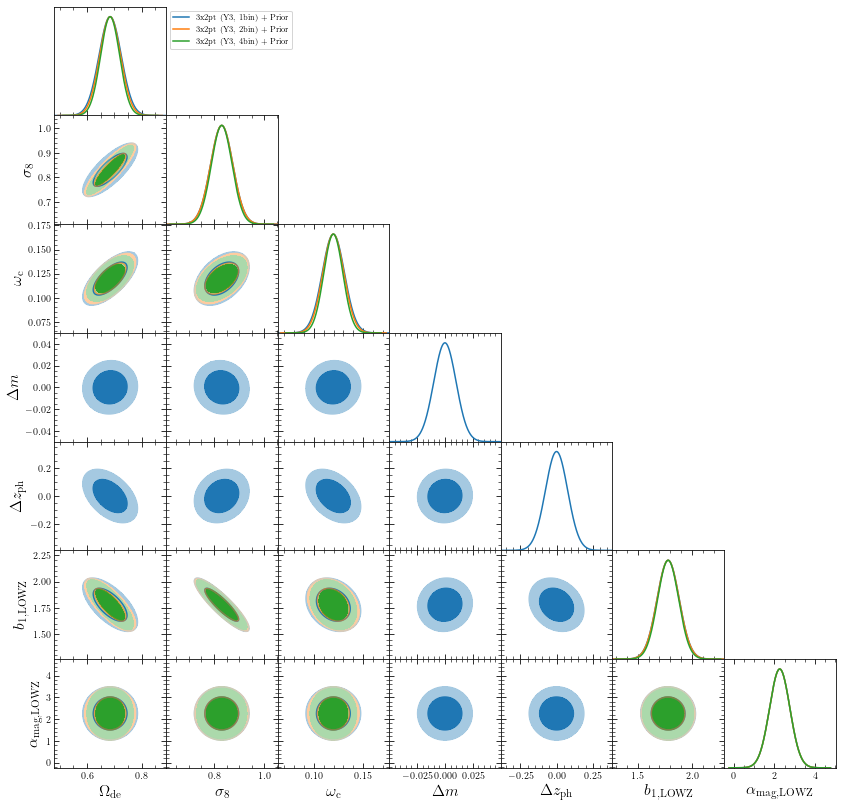

In [12]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3double3x2ptPrior_fY3quadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

In [29]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

print(df.to_latex(escape=False))

with open('figures/Y3_single_double_quadruple_table.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
    
df

using dark_emulator at  /Users/sunao-mac/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py
\begin{tabular}{llll}
\toprule
{} & $\sigma_8$ & $\Omega_\mathrm{de}$ &    $S_8$ \\
\midrule
3x2pt (Y3, 1bin) + Prior &    0.04430 &              0.04076 &  0.03387 \\
3x2pt (Y3, 2bin) + Prior &    0.04419 &              0.03816 &  0.02426 \\
3x2pt (Y3, 4bin) + Prior &    0.04102 &              0.03482 &  0.02011 \\
\bottomrule
\end{tabular}



,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8$
"3x2pt (Y3, 1bin) + Prior",0.04430,0.04076,0.03387
"3x2pt (Y3, 2bin) + Prior",0.04419,0.03816,0.02426
"3x2pt (Y3, 4bin) + Prior",0.04102,0.03482,0.02011


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8$
"3x2pt (Y3, 1bin) + Prior",0.04430,0.04076,0.03387
"3x2pt (Y3, 2bin) + Prior",0.04419,0.03816,0.02426
"3x2pt (Y3, 4bin) + Prior",0.04102,0.03482,0.02011


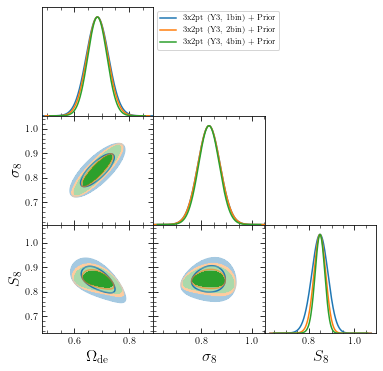

In [30]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3double3x2ptPrior_fY3quadruple3x2ptPrior_sigma8Ode.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

## same but with optimized $\alpha$ of $S_8$

In [38]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]
df = hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

print(df.to_latex(escape=False))

with open('figures/Y3_single_double_quadruple_table_S8alphaopt.tex', 'w') as f:
    f.write(df.to_latex(escape=False))
df

Optimizing alpha of S8 to 0.3178463203236498
Optimizing alpha of S8 to 0.38200475882992346
Optimizing alpha of S8 to 0.40016837258423416
\begin{tabular}{lllll}
\toprule
{} & $\sigma_8$ & $\Omega_\mathrm{de}$ & $S_8(0.5)$ & $S_8(\alpha)$ \\
\midrule
3x2pt (Y3, 1bin) + Prior &    0.04430 &              0.04076 &    0.03387 &       0.02779 \\
3x2pt (Y3, 2bin) + Prior &    0.04419 &              0.03816 &    0.02426 &       0.02166 \\
3x2pt (Y3, 4bin) + Prior &    0.04102 &              0.03482 &    0.02011 &       0.01770 \\
\bottomrule
\end{tabular}



,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt (Y3, 1bin) + Prior",0.04430,0.04076,0.03387,0.02779
"3x2pt (Y3, 2bin) + Prior",0.04419,0.03816,0.02426,0.02166
"3x2pt (Y3, 4bin) + Prior",0.04102,0.03482,0.02011,0.01770


Optimizing alpha of S8 to 0.3178463203236498
Optimizing alpha of S8 to 0.38200475882992346
Optimizing alpha of S8 to 0.40016837258423416
Optimizing alpha of S8 to 0.3178463203236498
Optimizing alpha of S8 to 0.38200475882992346
Optimizing alpha of S8 to 0.40016837258423416
Optimizing alpha of S8 to 0.3178463203236498
Optimizing alpha of S8 to 0.38200475882992346
Optimizing alpha of S8 to 0.40016837258423416
Optimizing alpha of S8 to 0.3178463203236498
Optimizing alpha of S8 to 0.38200475882992346
Optimizing alpha of S8 to 0.40016837258423416


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt (Y3, 1bin) + Prior",0.04430,0.04076,0.03387,0.02779
"3x2pt (Y3, 2bin) + Prior",0.04419,0.03816,0.02426,0.02166
"3x2pt (Y3, 4bin) + Prior",0.04102,0.03482,0.02011,0.01770


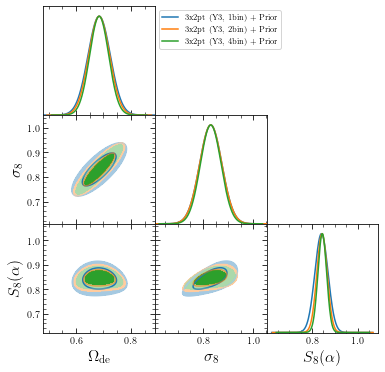

In [40]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8opt'],
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3double3x2ptPrior_fY3quadruple3x2ptPrior_sigma8Ode_S8alphaopt.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

Optimizing alpha of S8 to 0.3178463203236498
Optimizing alpha of S8 to 0.38200475882992346
Optimizing alpha of S8 to 0.40016837258423416
Optimizing alpha of S8 to 0.3178463203236498
Optimizing alpha of S8 to 0.38200475882992346
Optimizing alpha of S8 to 0.40016837258423416
Optimizing alpha of S8 to 0.3178463203236498
Optimizing alpha of S8 to 0.38200475882992346
Optimizing alpha of S8 to 0.40016837258423416
Optimizing alpha of S8 to 0.3178463203236498
Optimizing alpha of S8 to 0.38200475882992346
Optimizing alpha of S8 to 0.40016837258423416


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8(0.5)$,$S_8(\alpha)$
"3x2pt (Y3, 1bin) + Prior",0.04430,0.04076,0.03387,0.02779
"3x2pt (Y3, 2bin) + Prior",0.04419,0.03816,0.02426,0.02166
"3x2pt (Y3, 4bin) + Prior",0.04102,0.03482,0.02011,0.01770


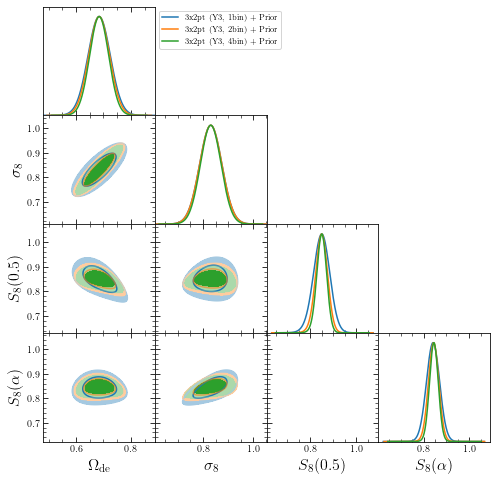

In [41]:
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3double3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8','S8opt'],
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3double3x2ptPrior_fY3quadruple3x2ptPrior_sigma8Ode_S8_S8alphaopt.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8', 'S8opt'])

### single: degeneracy breaking comparing 1x2pt, 2x2pt, 3x2pt

b1lowz is not included any fisher analysis. Omitting it.
alphamaglowz is not included any fisher analysis. Omitting it.


,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8$
"Cosmic Shear (Y3, 1bin) + Prior",0.12769,0.11417,0.05258
"2x2pt (Y3, 1bin) + Prior",0.10847,0.05839,0.07019
"3x2pt (Y3, 1bin) + Prior",0.04430,0.04076,0.03387


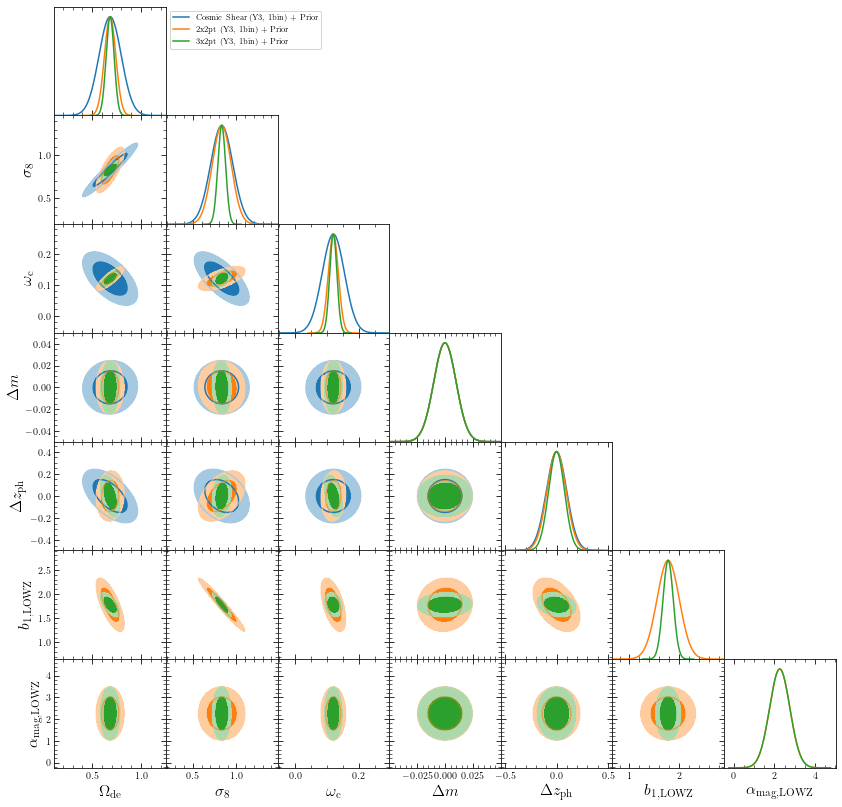

In [17]:
fishers = [fishers_dict[key] for key in ['Y3single1x2ptPrior', 'Y3single2x2ptPrior', 'Y3single3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single1x2ptPrior_fY3single2x2ptPrior_fY3single3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8$
"Cosmic Shear (Y1, 1bin) + Prior",0.31146,0.24719,0.10382
"2x2pt (Y1, 1bin) + Prior",0.14931,0.05980,0.11418
"3x2pt (Y1, 1bin) + Prior",0.07672,0.05323,0.04363


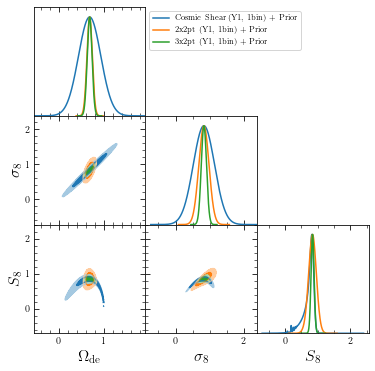

In [18]:
fishers = [fishers_dict[key] for key in ['Y1single1x2ptPrior', 'Y1single2x2ptPrior', 'Y1single3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY1single1x2ptPrior_fY1single2x2ptPrior_fY1single3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

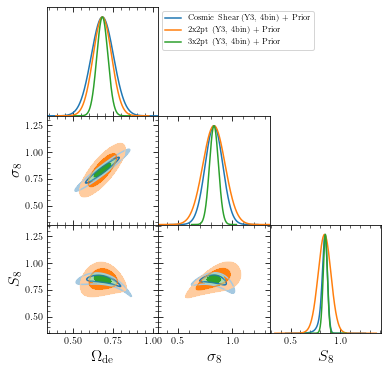

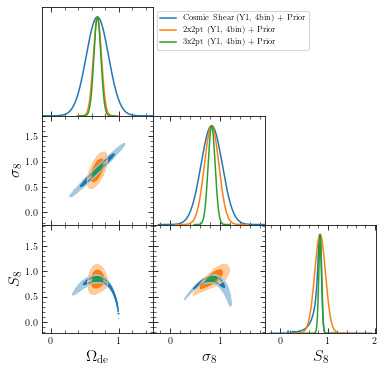

In [19]:
fishers = [fishers_dict[key] for key in ['Y3quadruple1x2ptPrior', 'Y3quadruple2x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)

fishers = [fishers_dict[key] for key in ['Y1quadruple1x2ptPrior', 'Y1quadruple2x2ptPrior', 'Y1quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)

### w/ and w/o Priors

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8$
"3x2pt (Y3, 1bin)",0.15230,0.06737,0.17918
"3x2pt (Y3, 1bin) + Prior",0.04430,0.04076,0.03387


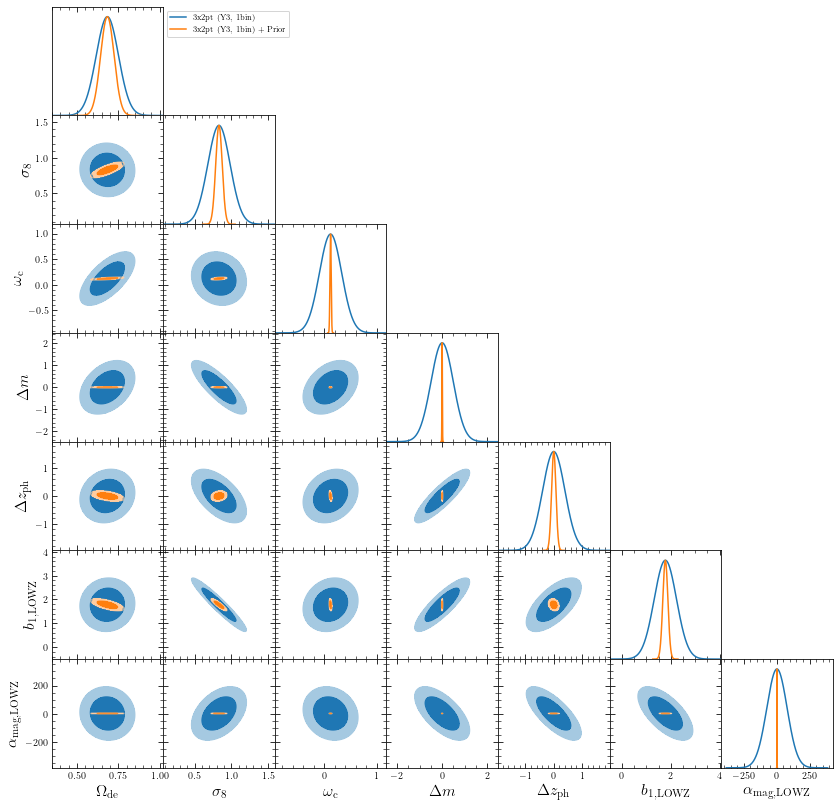

In [20]:
fishers = [fishers_dict[key] for key in ['Y3single3x2pt', 'Y3single3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2pt_fY3single3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8$
"3x2pt (Y3, 1bin) + Prior",0.04430,0.04076,0.03387
"3x2pt (Y3, 1bin) + TwiceWiderPrior",0.04514,0.04424,0.04602


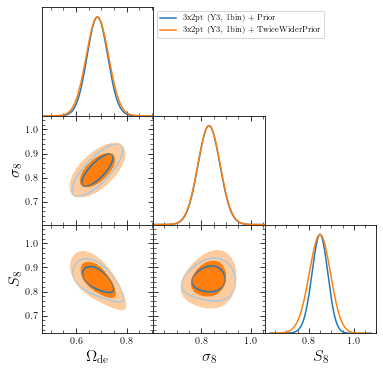

In [21]:
fishers_dict['Y3single3x2ptTwiceWiderPrior'] = fishers_dict['Y3single3x2pt'].addPrior([0.00038, 0.0042, 1, 1, 1, 0.2, 0.02], 
                                                                                        ['omega_b', 'ns', 
                                                                                         'alphamaglowz','alphamagcmass1','alphamagcmass2',
                                                                                         'dzph', 'dm'], label='TwiceWiderPrior')
fishers = [fishers_dict[key] for key in ['Y3single3x2ptPrior', 'Y3single3x2ptTwiceWiderPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], #, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY3single3x2ptPrior_fY3single3x2ptTwiceWiderPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

### Comparison between Y1 and Y3

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8$
"3x2pt (Y1, 1bin) + Prior",0.07672,0.05323,0.04363
"3x2pt (Y3, 1bin) + Prior",0.04430,0.04076,0.03387


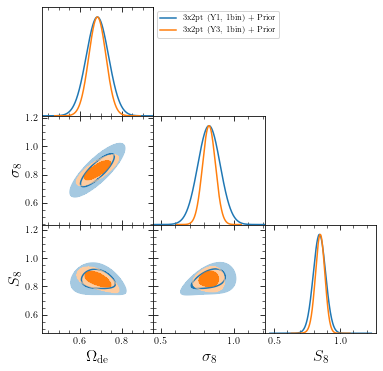

In [22]:
fishers = [fishers_dict[key] for key in ['Y1single3x2ptPrior', 'Y3single3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'],#, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
fig.export('figures/corner_fY1single3x2ptPrior_fY3single3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8$
"2x2pt (Y1, 1bin) + Prior",0.14931,0.05980,0.11418
"2x2pt (Y3, 1bin) + Prior",0.10847,0.05839,0.07019


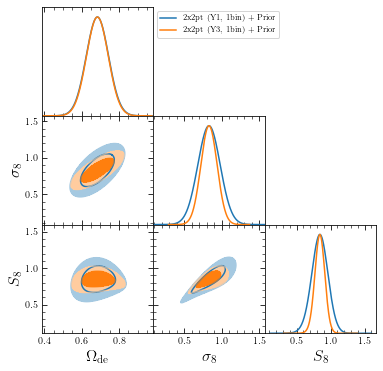

In [23]:
fishers = [fishers_dict[key] for key in ['Y1single2x2ptPrior', 'Y3single2x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], #, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY1single2x2ptPrior_fY3single2x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])

,$\sigma_8$,$\Omega_\mathrm{de}$,$S_8$
"3x2pt (Y1, 4bin) + Prior",0.07046,0.05153,0.02901
"3x2pt (Y3, 4bin) + Prior",0.04102,0.03482,0.02011


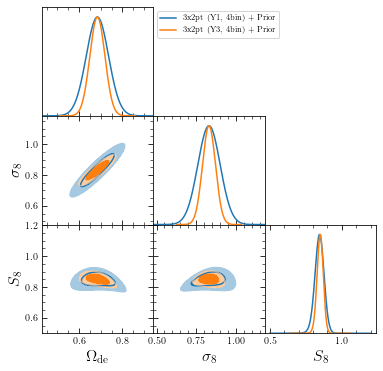

In [24]:
fishers = [fishers_dict[key] for key in ['Y1quadruple3x2ptPrior', 'Y3quadruple3x2ptPrior']]

fig = corner.plot_corner(fishers,
                         ['Omega_de', 'sigma8', 'S8'], #, 'omega_c', 'dm', 'dzph', 'b1lowz', 'alphamaglowz'], 
                         figsize_ratio=2, usetex=True)
#fig.export('figures/corner_fY1quadruple3x2ptPrior_fY3quadruple3x2ptPrior.pdf')

hsc3x2pt.compare1Sigma(fishers, ['sigma8', 'Omega_de', 'S8'])